بِسْمِ ٱللَّٰهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ



# Milestones 2 Phase 1

# Predicting Forest Fire in Algeria Using Supervised Learning

Ahmad Luay Adnani, Batch: FTDS-018-RMT

[Dataset](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)

[Hugging Face](https://huggingface.co/spaces/ahmadluay/forest_fire_prediction)

---

# i.Introduction
> This section contains the background analysis, problem statements and conceptual problems.

## Background

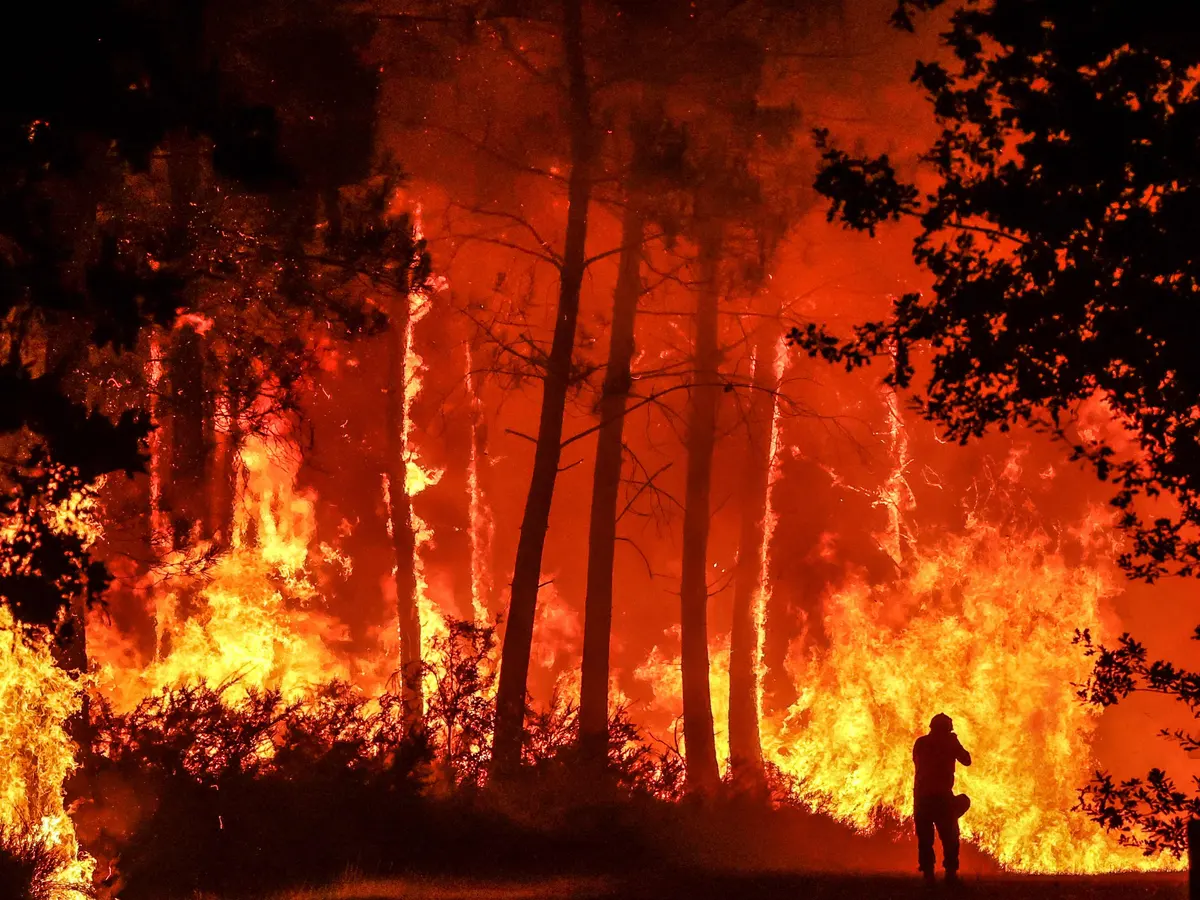

Forest fires are a serious issue in Algeria, particularly during the summer months when hot, dry weather and strong winds increase the risk of fires spreading rapidly. The country has a significant amount of forested land, particularly in the northern coastal region, which is particularly vulnerable to fires. Predicting forest fires in Algeria is important in order to prevent or mitigate their impact.

## Problem Statements

Since predicting such critical environmental issue is
essential to mitigate the threat of forest fires,  then the problem statement will be: __How to predict the forest fires in order to prevent or mitigate the impact of forest fires?__

To answer the question above, the analysis can be done by Classification models to predict the forest fires, using classification machine learning algorithm:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest

The above algorithm is trained using cross-validation to identify the algorithm with the highest __f1-score__.  A high F1 score indicates that the model has a good balance of precision and recall, and is able to make accurate predictions while minimizing the number of false positives and false negatives. In general, a high F1 score closer to 1 indicates that the model is performing well and is making reliable predictions.


## Objective
The objective of this analysis to serve as input to companies in the IT field so they can integrate the machine learning models that we make into IoT (Internet of Things)-based smart sensors, IoT sensors can not only observe the real-time conditions of an area, but it can also predict fire when combined with Machine learning.

---

# ii. Importing Libraries
> This section contains the process of importing libraries and checking the version of the libraries that will be used in this analysis.

## Import Libraries
This section explains how to import the libraries that will be used in the analysis. The main library used for this analysis will be `scikit-learn`. In addition to `scikit-learn`, the libraries used in this analysis include `pandas`, `numpy`, `matplotlib`, and `seaborn`.

In [1]:
!pip install feature_engine
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly
import plotly.express as px

# handling outliers
from feature_engine.outliers import Winsorizer

# Split Dataset, Standarize, and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# create pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For Classification Problems
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# import SVM
from sklearn.svm import SVC

# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Evaluate Classification Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Save and Load Model
import pickle
import json

You should consider upgrading via the 'C:\Users\luay9\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## Libraries Version
This section explains how to check the version of the libraries that will be used in the analysis.

In [2]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('plotly version :',(plotly.__version__))
print('scikit-learn version :',(sklearn.__version__))

pandas version : 1.5.3
numpy version : 1.23.5
matplotlib version : 3.6.3
seaborn version : 0.12.2
plotly version : 5.13.1
scikit-learn version : 1.2.1


---

# iii. Data Loading

> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, checking for missing values, checking for duplicated entries, and measuring of central tendency.

## Data Loading

This section explains the process of data loading. Dataset used in this analysis is [`Algerian Forest Fires Dataset`](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++) on UCI Machine Learning Repository.

In [3]:
# Data Loading
df= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
# Displaying the top 10 rows of the dataset
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [4]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
234,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,fire
235,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,fire
236,23,9,2012,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,fire
237,24,9,2012,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,not fire
238,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,not fire
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


Following are the variables and definitions of each column in the dataset.

| Column | Description |
| --- | --- |
| `Date` | (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) |
| `Temp ` | temperature noon (temperature max) in Celsius degrees: 22 to 42 |
| `RH` | Relative Humidity in %: 21 to 90 |
| `Ws` | Wind speed in km/h: 6 to 29 |
| `Rain` | total day in mm: 0 to 16.8 |
| `FFMC` | Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 |
| `DMC` | Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 |
| `DC` | Drought Code (DC) index from the FWI system: 7 to 220.4 |
| `ISI` | Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 |
| `BUI` | Buildup Index (BUI) index from the FWI system: 1.1 to 68 |
| `FWI` | Fire Weather Index (FWI) Index: 0 to 31.1 |
| `Classes` | two classes, namely `fire` and `not fire` |



## Size of Dataset
This section explains how to check the size of the dataset.

In [5]:
# size of dataset
df.shape

(244, 14)

## Information
This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [6]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


## Missing Values
This section explains the process for checking missing values.

In [7]:
# check for missing value
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        0
dtype: int64

There is 1 missing value in this dataset.

## Checking for Duplicated Data

This section explains the process to check for duplicated data in the dataset.

In [8]:
# Check for duplicated entries
df.duplicated().value_counts()

False    244
dtype: int64

There is no duplicated data in this dataset.

## Measure of Central Tendency

Following are the measure of central tendency of the dataset used in this analysis.

In [9]:
# measure of central tendency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


---

# iv. Exploratory Data Analysis
> This section contains data exploration of the dataset used in this analysis.

## Forest Fire

This section describes data exploration to determine the number of forest fires that ocurred in 2012 in Algeria.

In [10]:
# number of forest fire
df_eda = df.copy()
fire = df_eda.Classes.value_counts().to_frame().reset_index()
fire

,index,Classes
0,fire,138
1,not fire,106


In [11]:
# Plot PieChart with Plotly
fig = px.pie(fire,values='Classes', names='index',color_discrete_sequence=['brown','orange'])
fig.update_layout(title_text = "Number of Forest Fire", title_x = 0.5)
fig.show()

From the visualization above, the number of forest fires that occurred is balanced with the number of forest fires that did not occur. After knowing the number of forest fires, further exploration is carried out to find out when forest fires occur most frequently

### The month with the most occurrence of forest fires

This section describes data exploration for finding the month in which forest fires occur most frequently.

In [12]:
# month with the most occurrence of forest fire
df_eda = df.copy()
df_eda[df_eda['Classes']=='fire'].month.mode()

0    8
Name: month, dtype: int64

In [13]:
# Number of Forest Fire
fires = df_eda.groupby(['Classes','month']).aggregate(Number_of_Forest_Fire=('Classes','count'))
fires = fires.reset_index()
fires

,Classes,month,Number_of_Forest_Fire
0,fire,6,25
1,fire,7,39
2,fire,8,51
3,fire,9,23
4,not fire,6,35
5,not fire,7,23
6,not fire,8,11
7,not fire,9,37


In [14]:
# average
print('--------------------------------------------')
print('Average Temperature in June 2012 = ',df_eda[df_eda['month']==6].Temperature.mean(),'degree Celsius')
print('Average Relative Humidity in June 2012 = ',df_eda[df_eda['month']==6].RH.mean(),'%')
print('Average Wind Speed in June 2012 = ',df_eda[df_eda['month']==6].Ws.mean(),'km/h')
print('Average Rain Intensity in June 2012 = ',df_eda[df_eda['month']==6].Rain.mean(),'mm')
print('--------------------------------------------')
print('Average Temperature in July 2012 = ',df_eda[df_eda['month']==7].Temperature.mean(),'degree Celsius')
print('Average Relative Humidity in July 2012 = ',df_eda[df_eda['month']==7].RH.mean(),'%')
print('Average Wind Speed in July 2012 = ',df_eda[df_eda['month']==7].Ws.mean(),'km/h')
print('Average Rain Intensity in July 2012 = ',df_eda[df_eda['month']==7].Rain.mean(),'mm')
print('--------------------------------------------')
print('Average Temperature in August 2012 = ',df_eda[df_eda['month']==8].Temperature.mean(),'degree Celsius')
print('Average Relative Humidity in August 2012 = ',df_eda[df_eda['month']==8].RH.mean(),'%')
print('Average Wind Speed in August 2012 = ',df_eda[df_eda['month']==8].Ws.mean(),'km/h')
print('Average Rain Intensity in August 2012 = ',df_eda[df_eda['month']==8].Rain.mean(),'mm')
print('--------------------------------------------')
print('Average Temperature in September 2012 = ',df_eda[df_eda['month']==9].Temperature.mean(),'degree Celsius')
print('Average Relative Humidity in September 2012 = ',df_eda[df_eda['month']==9].RH.mean(),'%')
print('Average Wind Speed in September 2012 = ',df_eda[df_eda['month']==9].Ws.mean(),'km/h')
print('Average Rain Intensity in September 2012 = ',df_eda[df_eda['month']==9].Rain.mean(),'mm')
print('--------------------------------------------')

--------------------------------------------
Average Temperature in June 2012 =  30.8 degree Celsius
Average Relative Humidity in June 2012 =  65.28333333333333 %
Average Wind Speed in June 2012 =  15.333333333333334 km/h
Average Rain Intensity in June 2012 =  0.975 mm
--------------------------------------------
Average Temperature in July 2012 =  33.04838709677419 degree Celsius
Average Relative Humidity in July 2012 =  62.29032258064516 %
Average Wind Speed in July 2012 =  16.096774193548388 km/h
Average Rain Intensity in July 2012 =  0.4516129032258064 mm
--------------------------------------------
Average Temperature in August 2012 =  35.33870967741935 degree Celsius
Average Relative Humidity in August 2012 =  53.983870967741936 %
Average Wind Speed in August 2012 =  15.32258064516129 km/h
Average Rain Intensity in August 2012 =  0.44838709677419364 mm
--------------------------------------------
Average Temperature in September 2012 =  29.366666666666667 degree Celsius
Average R

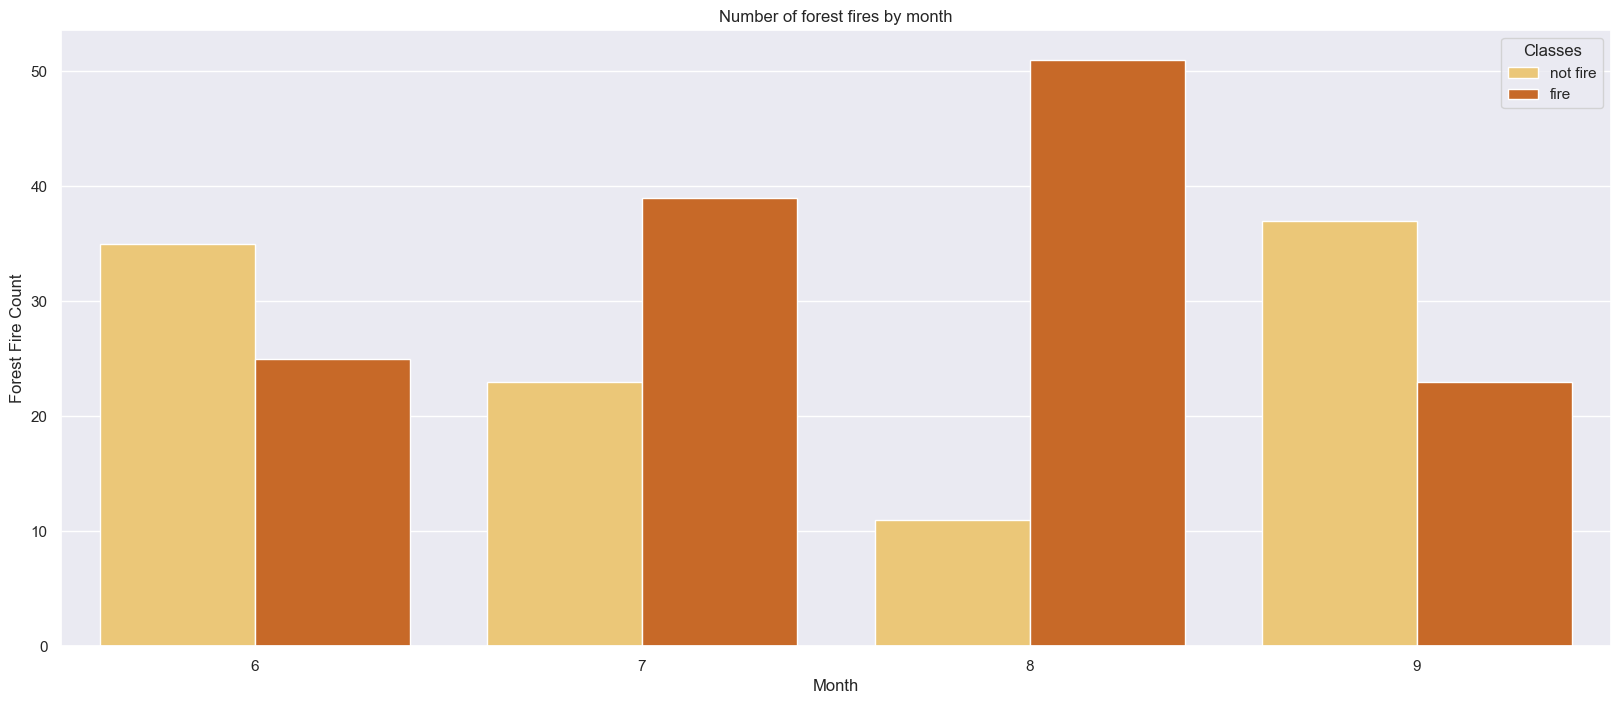

In [15]:
# create bar chart
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_eda.month, hue=df_eda.Classes,palette='YlOrBr')

plt.title('Number of forest fires by month')
plt.xlabel('Month')
plt.ylabel('Forest Fire Count')
plt.show()

In [16]:
# plotting bar plot
fig = px.bar(fires, x="month", y="Number_of_Forest_Fire",color='Classes',color_discrete_sequence=['brown','orange'],
             orientation="v",hover_name="month"        
                
             )
fig.update_layout(title_text = "Number of forest fires by month", title_x = 0.5)
fig.show()

From this dataset it is known that forest fires most often occur in the summer, to be precise in **August**. **August** has the highest average temperature compared to other months, the lowest average relative humidity compared to other months and the lowest average rain intensity compared to other months.

## Temperature

This section describes data exploration to find the `Temperature` when a forest fire occurs.

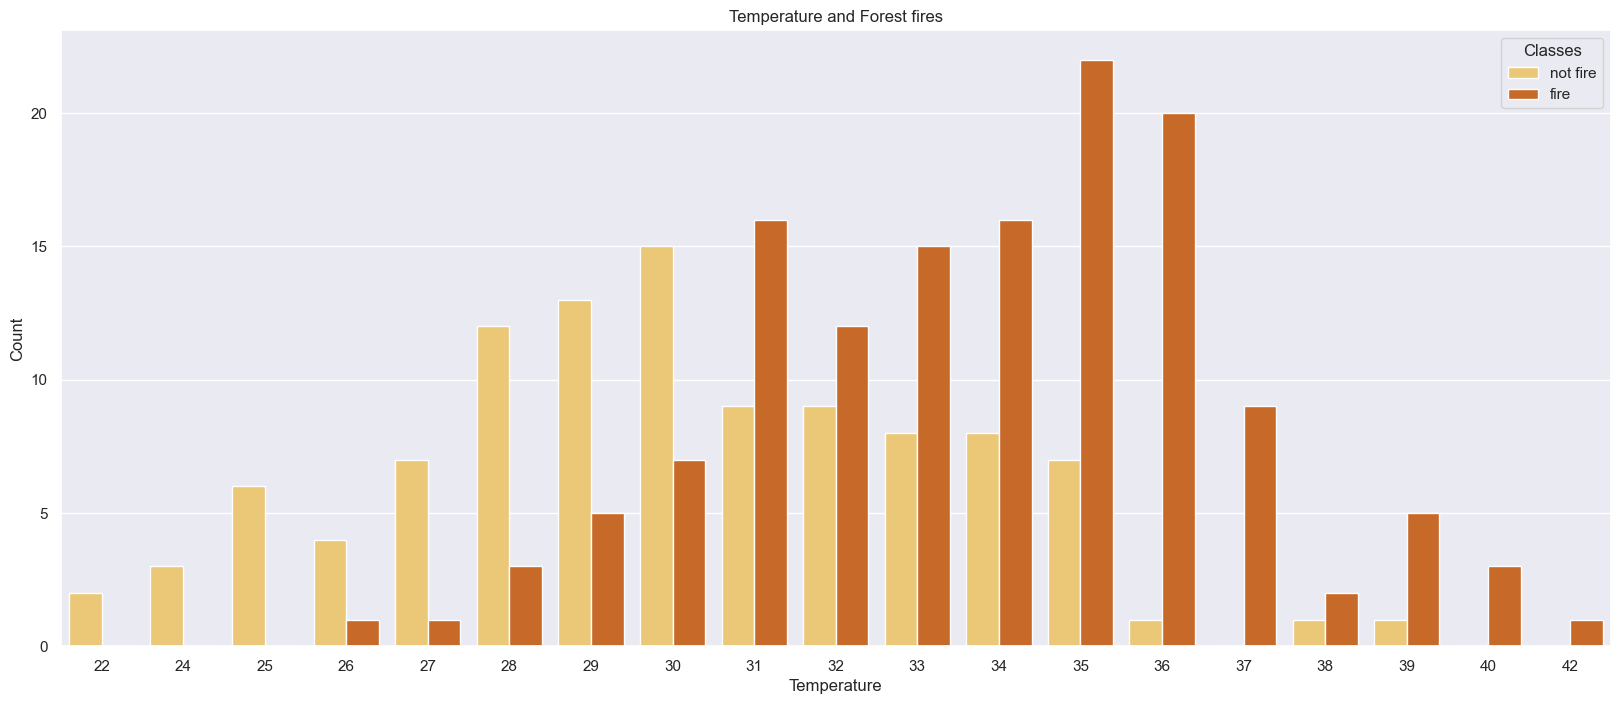

In [17]:
# create bar chart
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_eda.Temperature, hue=df_eda.Classes,palette='YlOrBr')

plt.title('Temperature and Forest fires')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [18]:
# average temperature
df_eda[(df_eda['Classes']=='fire')].Temperature.mean()

33.81884057971015

From the visualization above, the average temperature when a forest fire occurs is 33.82 degree Celsius. 

## Relative Humidity

This section describes data exploration to find the level of `relative humidity` when a forest fire occurs.

In [19]:
# create a new column based on humidity group
df_eda['RH_bins']=pd.cut(
    x=df_eda['RH'],
    bins=[21,26,31,36,41,46,51,56,61,66,71,76,81,86,91],
    labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76-80','81-85','86-90'])
df_eda.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,RH_bins
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,56-60
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,56-60
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,81-85
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,86-90
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,76-80


In [20]:
# humidity when a forest fire occurs
df_eda[df_eda['Classes']=='fire'].RH.mode()

0    55
Name: RH, dtype: int64

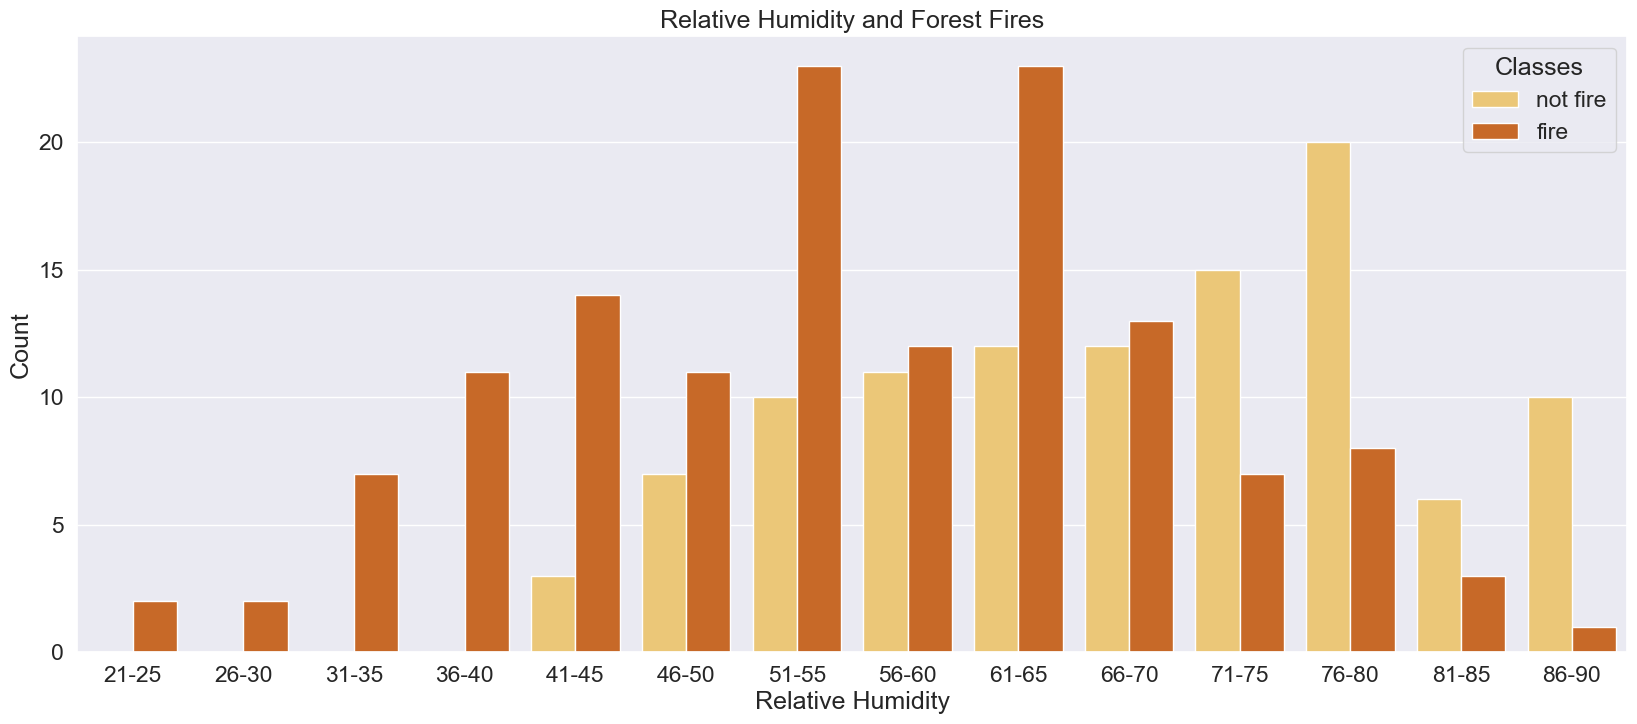

In [21]:
# create bar chart
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_eda.RH_bins, hue=df_eda.Classes,palette='YlOrBr')

plt.title('Relative Humidity and Forest Fires')
plt.xlabel('Relative Humidity')
plt.ylabel('Count')
plt.show()

From the visualization above, forest fires most often occur when the relative humidity is 55%. The more relative humidity increases, the more likely it is that a forest fire will not occur.

## Rain

This section describes data exploration to find the intensity of `rain` when a forest fire occurs.

In [22]:
# forest fire when raining
rain = df_eda[df_eda['Classes']=='fire'].Rain.value_counts().reset_index()
rain = rain.rename(columns={'index':'rain_intensity'})
rain

,rain_intensity,Rain
0,0.0,114
1,0.1,9
2,0.3,4
3,0.2,4
4,0.6,2
5,0.5,2
6,6.0,1
7,1.9,1
8,0.4,1


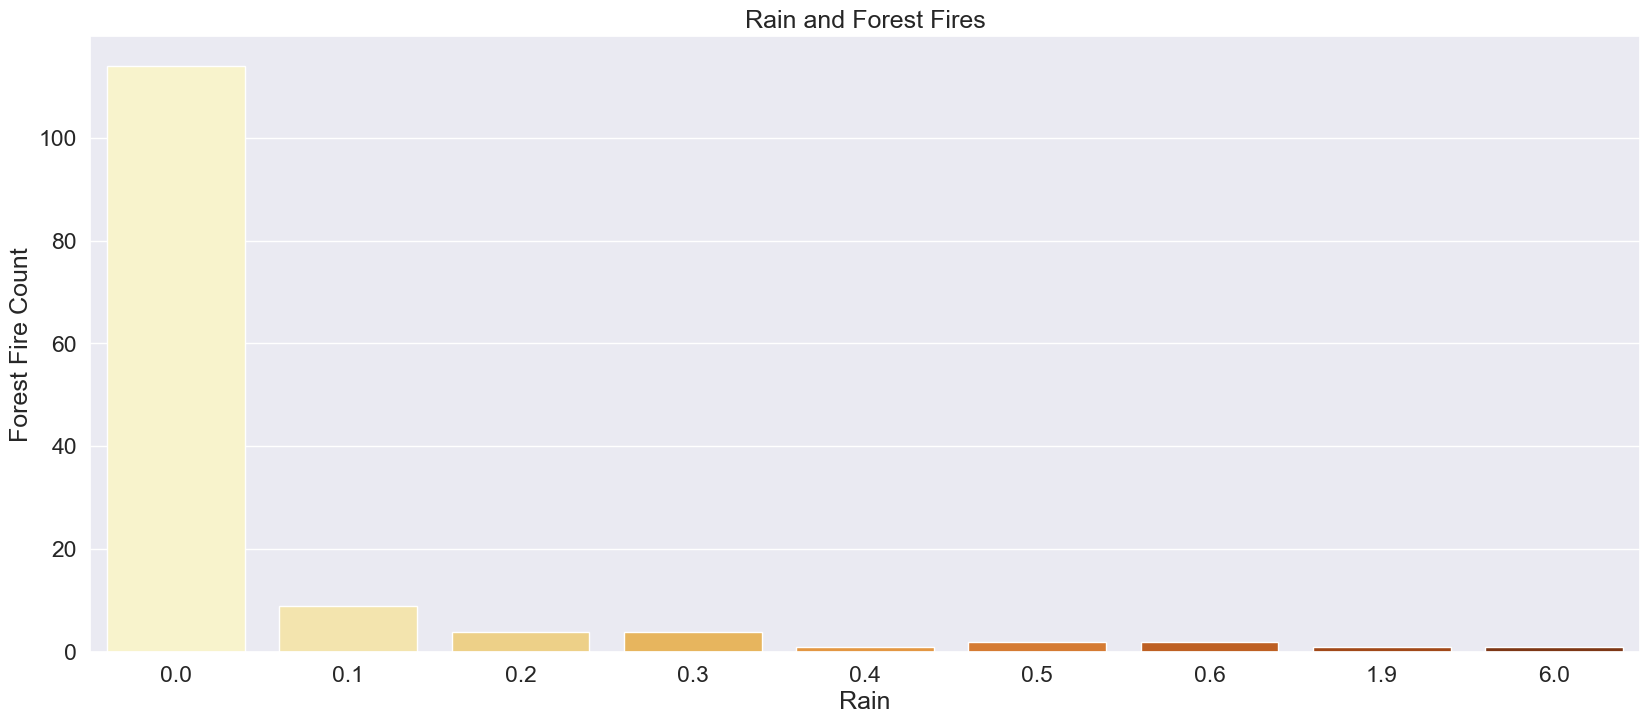

In [23]:
# create bar chart
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_eda[df_eda['Classes']=='fire'].Rain,palette='YlOrBr')

plt.title('Rain and Forest Fires')
plt.xlabel('Rain')
plt.ylabel('Forest Fire Count')
plt.show()

From the visualization above, most forest fire incidents occur when it is not raining. But there are also forest fires that occur when it is raining with low intensity.

## Fire Weather Index (FWI) System

This section explains the process of data exploration to find the `FWI` value that can cause forest fire. The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and __is used as a general index of fire danger throughout the forested areas__.

**Structure of the FWI System**

The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecutive daily observations of `temperature`, `relative humidity`,`wind speed` and `24-hour precipitation`. The six standard components provide numeric ratings of relative potential for wildland fire.

![Alt text](https://cwfis.cfs.nrcan.gc.ca/images/fwi_structure.gif)

| Range | Categories |
| --- | --- |
| `0 - 1` | Low |
| `2 - 6` | Moderate |
| `7 - 13` | High |
| `> 13 ` | Very High |


In [24]:
# FWI
df_eda['FWI_cat']=pd.cut(
    x=df_eda['FWI'],
    bins=[-1,1,6,13,np.inf],
    labels=['Low','Moderate','High','Very High'])
df_eda.groupby(['FWI_cat','Classes'])['Classes'].count().to_frame()

Classes
FWI_cat   Classes          
Low       fire            0
          not fire       81
Moderate  fire           32
          not fire       24
High      fire           54
          not fire        1
Very High fire           51
          not fire        0

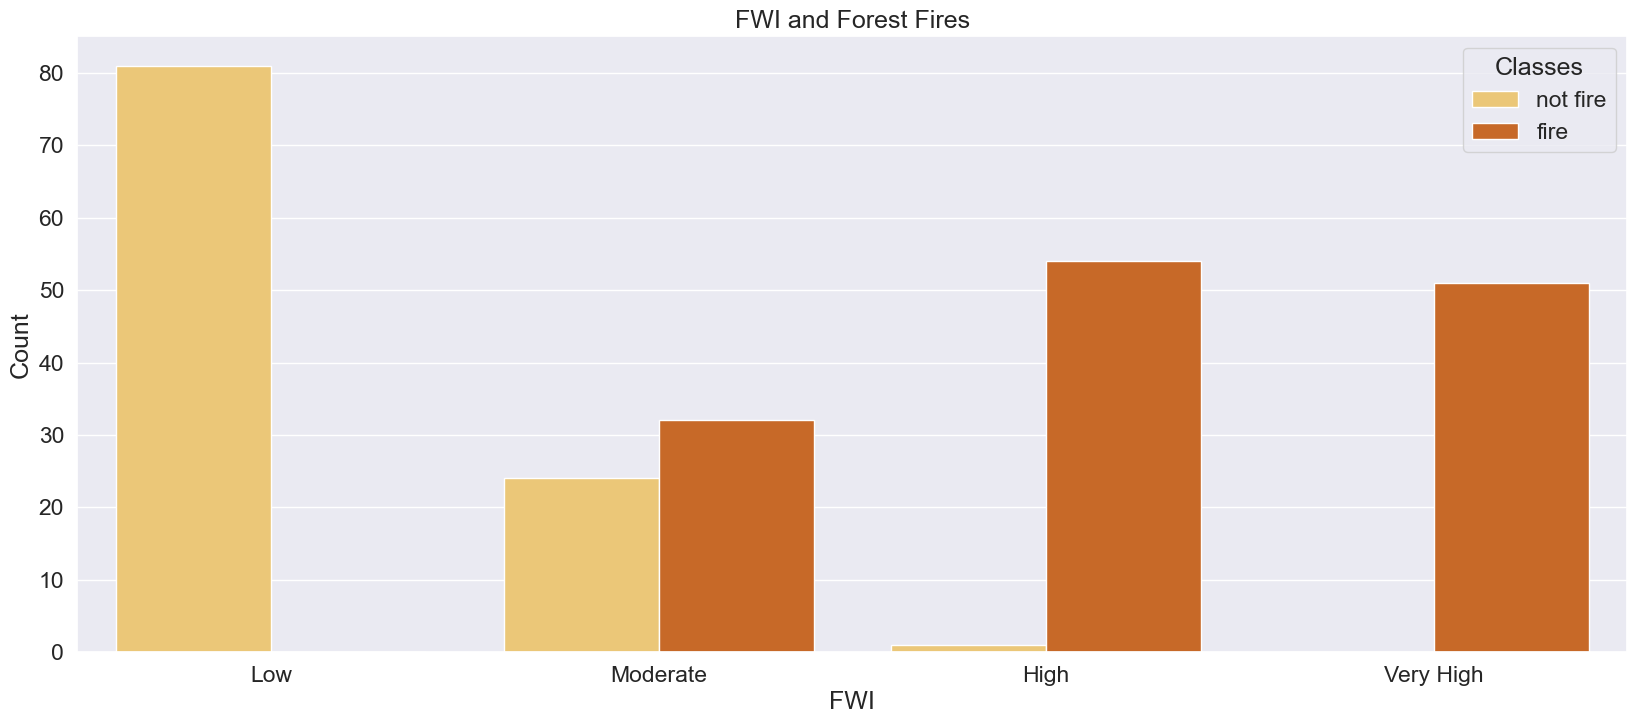

In [25]:
# create bar chart
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_eda.FWI_cat,hue=df_eda.Classes,palette='YlOrBr')

plt.title('FWI and Forest Fires')
plt.xlabel('FWI')
plt.ylabel('Count')
plt.show()

In [26]:
# Number of Forest Fire
fwi = df_eda.groupby(['FWI_cat','Classes']).aggregate(Number_of_Forest_Fire=('Classes','count'))
fwi = fwi.reset_index()
fwi

,FWI_cat,Classes,Number_of_Forest_Fire
0,Low,fire,0
1,Low,not fire,81
2,Moderate,fire,32
3,Moderate,not fire,24
4,High,fire,54
5,High,not fire,1
6,Very High,fire,51
7,Very High,not fire,0


In [27]:
# plotting bar plot
fig = px.bar(fwi, x="FWI_cat", y="Number_of_Forest_Fire",color='Classes',color_discrete_sequence=['brown','orange'],
             orientation="v",hover_name="FWI_cat"        
                
             )
fig.update_layout(title_text = "FWI and Forest Fires", title_x = 0.5)
fig.show()

From the visualization above, the potential for forest fires increases when the FWI value is in the range of 2-6 (moderate).

## Correlation Matrix Analysis
This section explains about correlation matrix analysis to find out the correlation between features and target (`Classes`). The cell below explains the process of performing a correlation matrix analysis to identify the features that are most strongly correlated with the target (`Classes`). To accomplish this, categorical data will be converted into numerical data using the `LabelEncoder` library.

In [28]:
df_copy = df.copy()

# Using LabelEncoder to convert categorical into numerical data
m_LabelEncoder = LabelEncoder()

df_copy['Classes']=m_LabelEncoder.fit_transform(df_copy['Classes'])
df_copy.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,1


<AxesSubplot: >

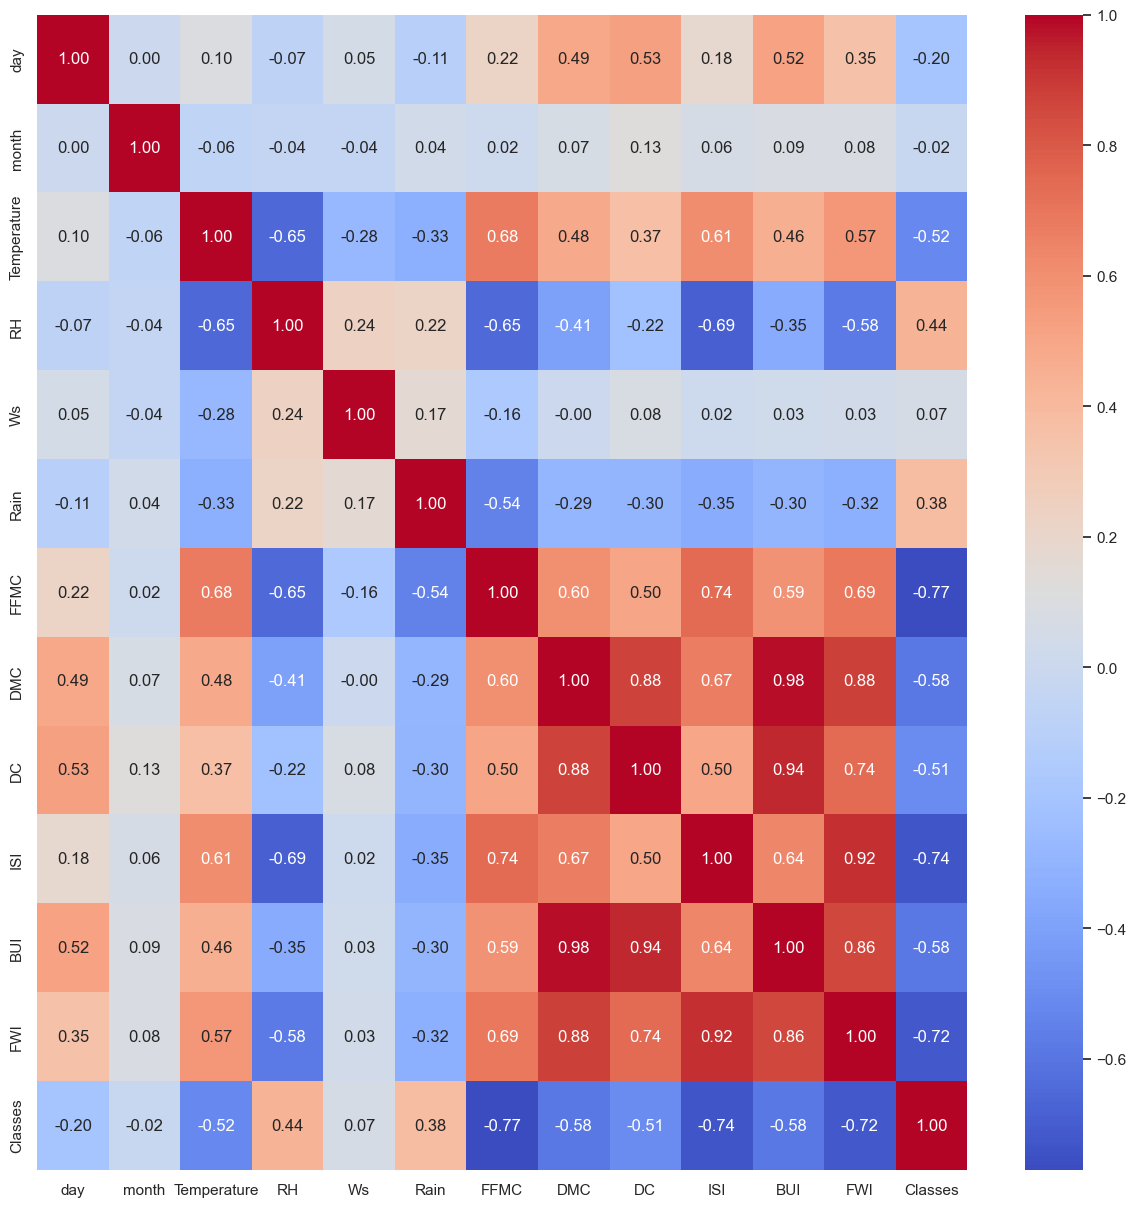

In [29]:
df_copy = df_copy.drop(['year'],axis=1)

# Plotting Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm', fmt='.2f')

In [30]:
# Get List of All Correlation

final_column = df_copy.corr()['Classes'] > 0.10
final_column = final_column[final_column==True]
final_column

RH         True
Rain       True
Classes    True
Name: Classes, dtype: bool

In [31]:
# Get List of All Correlation
final_column2 = df_copy.corr()['Classes'] < -0.10
final_column2= final_column2[final_column2==True]
final_column2

day            True
Temperature    True
FFMC           True
DMC            True
DC             True
ISI            True
BUI            True
FWI            True
Name: Classes, dtype: bool

From the visualization above, `month` and `Ws` has a low correlation to the target (`Classes`).

---

# v. Feature Engineering
> This section explains the process of preparing data for the model training process, such as data cleaning, creating data inference, separating data into train-tests, data transformation (normalization, encoding, etc.), and other processes needed.

## Creating Data Inference
This section explains how to create a data inference. Data inference is distinct from the train and test set, as it is still based on the original dataset and used to evaluate the model's performance on new, raw data. To create the data inference, we will set aside 10 data from the original dataset.

In [32]:
# Creating data inference
data = df.copy()
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 14)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,26,7,2012,36,53,19,0.0,89.2,17.1,98.6,10.0,23.9,15.3,fire
1,3,8,2012,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,not fire
2,4,8,2012,34,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,fire
3,16,8,2012,36,61,18,0.3,80.2,11.7,90.4,2.8,17.6,4.2,fire
4,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,not fire
5,20,9,2012,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire
6,29,7,2012,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,fire
7,30,7,2012,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,fire
8,6,8,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire
9,12,9,2012,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,fire


In [33]:
# Saving data inference as .csv file
df_inf.to_csv('h8dsft_p1m2_Ahmad Luay Adnani_inference.csv')

In [34]:
# Removing inference from dataset 
df_train_test  = data.drop(df_inf.index)
print('size of original dataset (rows,columns) :',data.shape)
print('size of dataset after data inference is removed (rows,columns) :',df_train_test .shape)
df_train_test .head()

size of original dataset (rows,columns) : (244, 14)
size of dataset after data inference is removed (rows,columns) : (234, 14)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


## Separating Dataset into Training Set and Testing Set
This section explains how to separate dataset into training set and testing set.

In [35]:
# Defining X and y (removing target)
X = df_train_test.drop(['year','Classes'],axis=1) # drop year and target
y = pd.DataFrame(df_train_test['Classes'])
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [36]:
# Separating Dataset into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X,  # features
                                                   y, # target = Classes
                                                   test_size=0.3, # test_set 30%
                                                   random_state=0) 

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
X_train = X_train.sort_index()
X_train

Train Size:  (163, 12)
Test Size:  (71, 12)


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [37]:
# X_test set
X_test = X_test.sort_index()
X_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
12,13,6,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
221,8,9,30,88,14,0.0,82.5,6.6,26.1,3.0,8.1,2.7
222,9,9,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7
223,10,9,29,74,15,1.1,59.5,4.7,8.2,0.8,4.6,0.3
224,11,9,30,73,14,0.0,79.2,6.5,16.6,2.1,6.6,1.2


In [38]:
# y_train set
y_train = y_train.sort_index()
y_train

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
6,fire
...,...
239,fire
240,not fire
241,not fire
242,not fire


In [39]:
# y_test set
y_test = y_test.sort_index()
y_test

,Classes
4,not fire
5,fire
7,fire
8,not fire
12,not fire
...,...
221,fire
222,fire
223,not fire
224,not fire


## Check the distribution of data
This section explains how to check the distribution of the data. The histogram and boxplot visualizations below show the distribution of numerical data in the dataset.

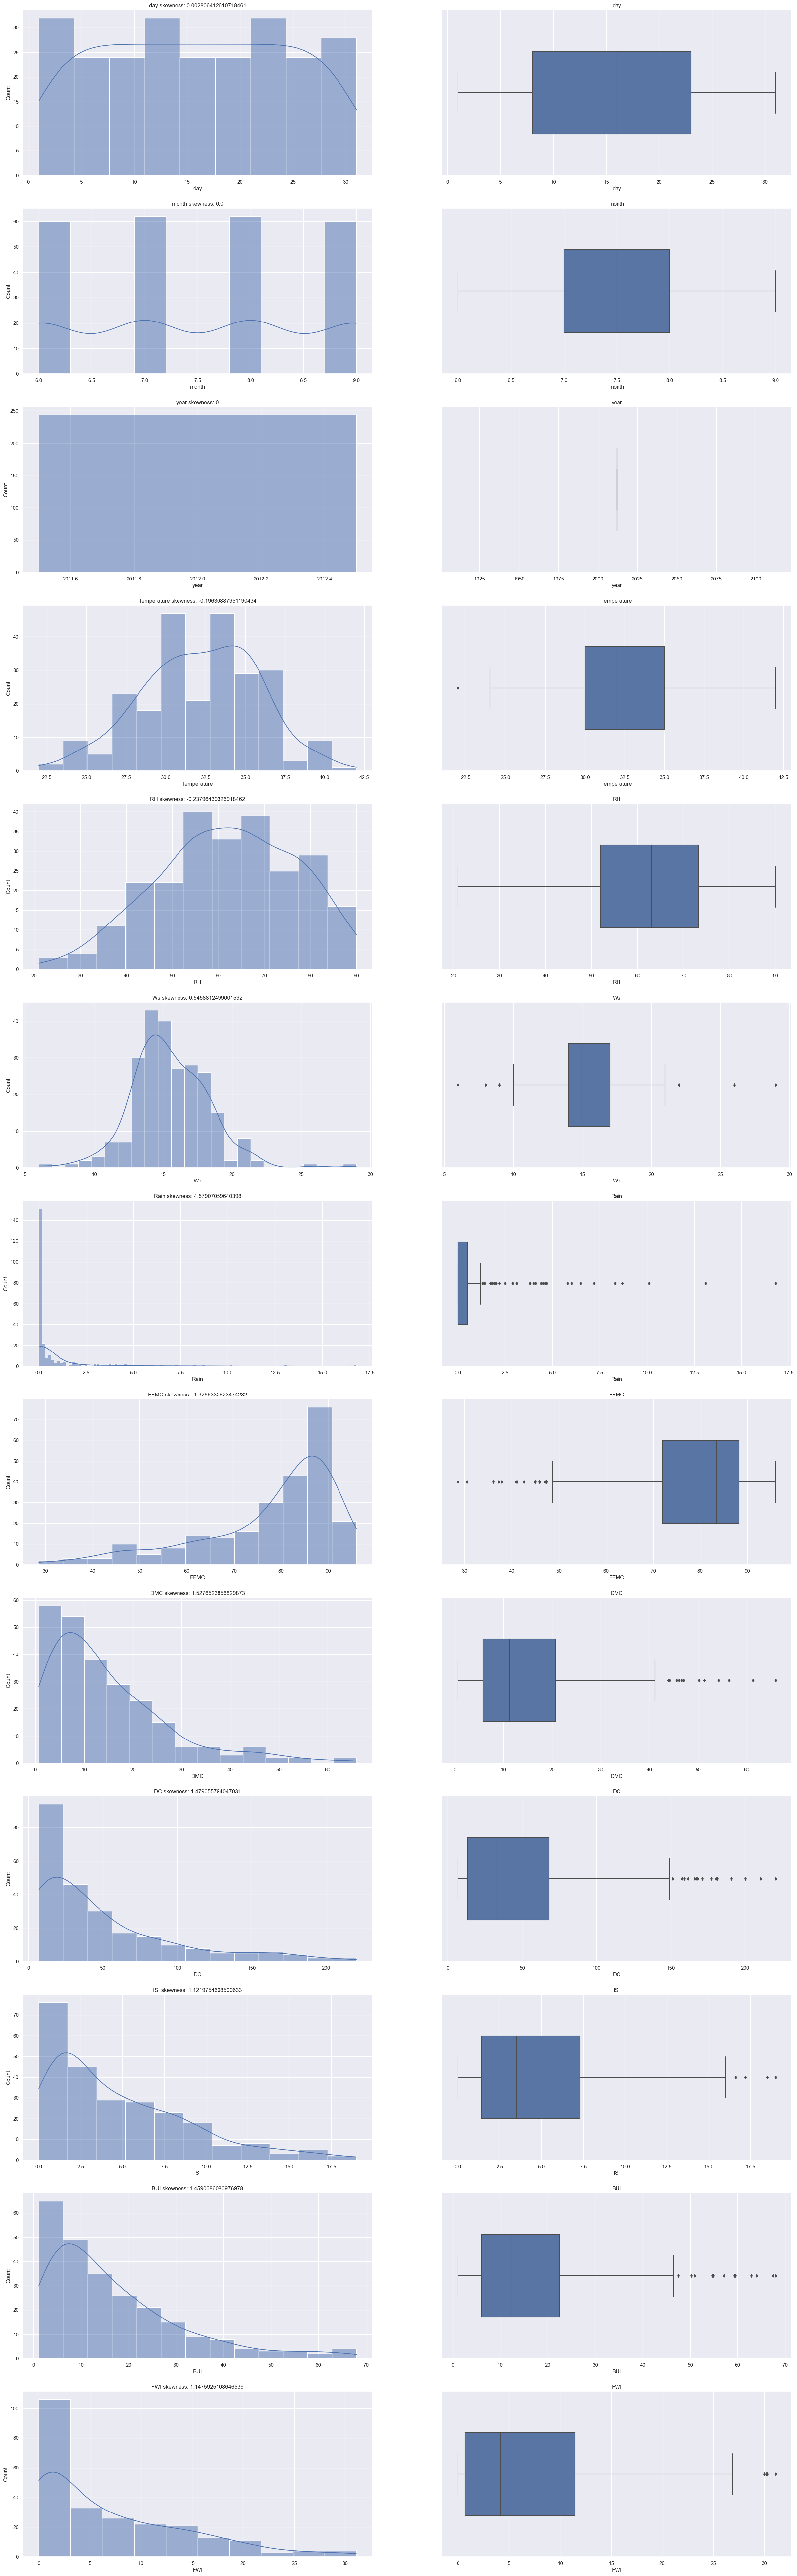

In [40]:
# plot histogram and boxplot
# numerical columns
data_num = data.drop(['Classes'],axis=1)
n=len(data_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,100))
for i in range(n):
    col = data_num.columns[i]
    sns.histplot(ax=ax[i,0],data=data_num[col],kde=True)
    ax[i,0].set_title(f'{col} skewness: {data_num[col].skew()}')
    sns.boxplot(ax=ax[i,1],data=data_num,x=data_num[col],width=0.50)
    ax[i,1].set_title(col)

In [41]:
# Create Function to calculate skewness
def skewness(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    print(f'Distribution of {col} : Normal Distribution')
  elif skewness<=-0.5:
    print(f'Distribution of {col} : Left Skewed')
  else:
    print(f'Distribution of {col} : Right Skewed')

In [42]:
# Distribution
n=len(data_num.columns)

for i in range(n):
    col = data_num.columns[i]
    skewness(data_num,col)

Distribution of day : Normal Distribution
Distribution of month : Normal Distribution
Distribution of year : Normal Distribution
Distribution of Temperature : Normal Distribution
Distribution of RH : Normal Distribution
Distribution of Ws : Right Skewed
Distribution of Rain : Right Skewed
Distribution of FFMC : Left Skewed
Distribution of DMC : Right Skewed
Distribution of DC : Right Skewed
Distribution of ISI : Right Skewed
Distribution of BUI : Right Skewed
Distribution of FWI : Right Skewed


Data that is normally distributed will be feature scaled using the `StandardScaler`, while those that are skewed will be feature scaled using the `MinMaxScaler` in the **feature scaling** section.

## Handling Missing Value

This section contains the process of handling missing values.

In [43]:
# check for missing value
X_test.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
dtype: int64

In [44]:
# percentage of missing value
print('Missing value: ',round(X_test.isnull().mean().sum(),2)*100,'%')

Missing value:  1.0 %


In [45]:
# Displays the missing values in the test set.
data_missing = X_test.copy()
print('size of data_missing : ',data_missing[data_missing.FWI.isnull()].shape)
data_missing[data_missing.FWI.isnull()].sort_index().head()

size of data_missing :  (1, 12)


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
165,14,7,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN


Because the number of missing values in the `FWI` column is only 1, then that row will be dropped.

In [46]:
# index with missing value
y_test.loc[165]

Classes    fire
Name: 165, dtype: object

In [47]:
# Dropping one missing value from FWI
X_test.dropna(subset = ['FWI'], inplace = True)
y_test.drop(index=df.index[165], axis=0, inplace=True)

In [48]:
# size of X_test after handling missing value
X_test.shape

(70, 12)

In [49]:
# size of y_test after handling missing value
y_test.shape

(70, 1)

## Handling Outlier
This section explains how to handle outliers in the train and test set.

In [50]:
# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*X_train[col].std()
    lower = df[col].mean() - 3*X_train[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

**Handling Outliers in Train set**

In [51]:
# percentage of outlier in train set
num = X_train
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    out,no_out, up, low = outlier_analysis (X_train,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(X_train))*100, '%') 
    print('-'*20)

column name: day
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: month
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: Temperature
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: RH
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: Ws
count of outlier:  6
percentage of outlier:  3.6809815950920246 %
--------------------
column name: Rain
count of outlier:  25
percentage of outlier:  15.337423312883436 %
--------------------
column name: FFMC
count of outlier:  11
percentage of outlier:  6.748466257668712 %
--------------------
column name: DMC
count of outlier:  6
percentage of outlier:  3.6809815950920246 %
--------------------
column name: DC
count of outlier:  5
percentage of outlier:  3.067484662576687 %
--------------------
column name: ISI
count of outlier:  3
percentage of outlier:  1.8404907975460123 %
--------------------
column name

Because there are too many outliers, outlier handling is done using the Capping Method.

In [52]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [53]:
# capping outlier if exist and in large proportion
var_skew = ['Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5,variables=var_skew)
wins.fit(X_train)
X_train_capped = wins.transform(X_train)
print('Size of dataset - After Capped  : ', X_train_capped.shape)

Size of dataset - After Capped  :  (163, 12)


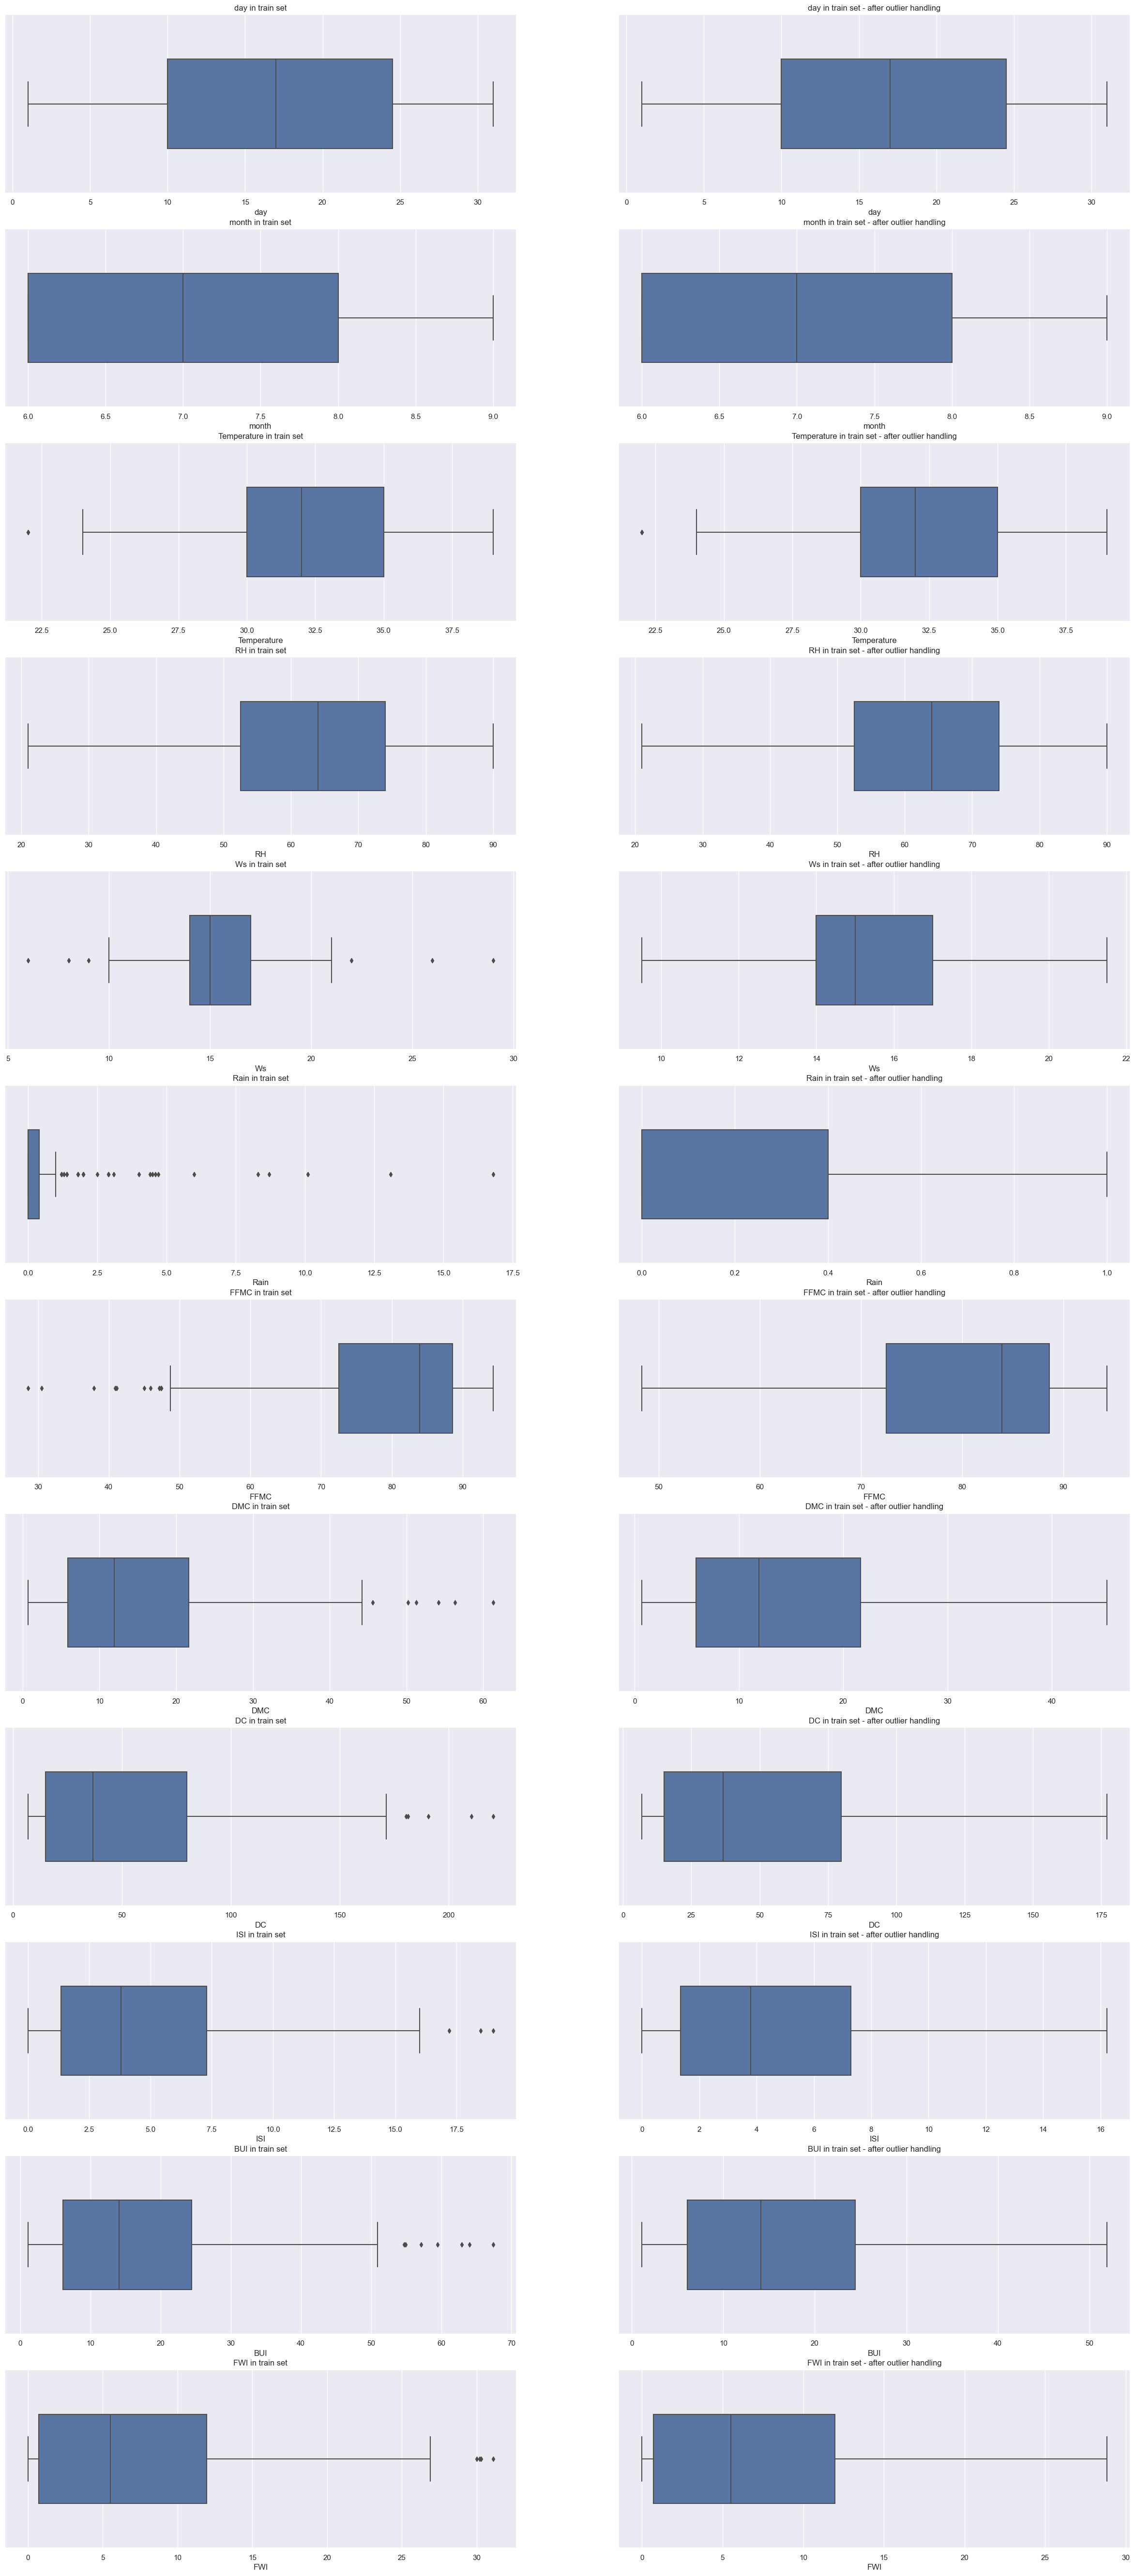

In [54]:
# Boxplot visualization
num = X_train_capped
n=len(num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i,0],data=X_train,x=X_train[col],width=0.50)
    ax[i,0].set_title(f'{col} in train set')
    sns.boxplot(ax=ax[i,1],data=X_train_capped,x=X_train_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} in train set - after outlier handling')

## Feature Selection
This section explains the process of creating a model with feature selection.

In [55]:
# Feature Selection
selector = SelectKBest(score_func=chi2, k=4)
selector = selector.fit(X_train_capped, y_train)

df_scores = pd.DataFrame({'Feature': X_train_capped.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
8,DC,1851.983705,0.0000
10,BUI,657.399587,0.0000
11,FWI,653.778993,0.0000
7,DMC,563.686542,0.0000
9,ISI,314.696894,0.0000
6,FFMC,233.922654,0.0000
3,RH,128.424992,0.0000
0,day,40.248688,0.0000
5,Rain,35.546517,0.0000
2,Temperature,15.127930,0.0001


Since the p-value for both the `month` and `Ws` features is **greater than 0.05**, this means that they have a low correlation with the target variable (`Classes`).

In [56]:
# Drop Unnecessary Features
Drop_Columns = ['month','Ws']
X_train_final = X_train_capped.drop(Drop_Columns,axis=1).sort_index()
X_test_final = X_test.drop(Drop_Columns,axis=1).sort_index()
X_train_final

,day,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,29,57,0.0,65.70,3.4,7.6,1.3,3.4,0.5
1,2,29,61,1.0,64.40,4.1,7.6,1.0,3.9,0.4
2,3,26,82,1.0,48.35,2.5,7.1,0.3,2.7,0.1
3,4,25,89,1.0,48.35,1.3,6.9,0.0,1.7,0.0
6,7,33,54,0.0,88.20,9.9,30.5,6.4,10.9,7.2
...,...,...,...,...,...,...,...,...,...,...
239,26,30,65,0.0,85.40,16.0,44.5,4.5,16.9,6.5
240,27,28,87,1.0,48.35,6.5,8.0,0.1,6.2,0.0
241,28,27,87,0.5,48.35,3.5,7.9,0.4,3.4,0.2
242,29,24,54,0.1,79.70,4.3,15.2,1.7,5.1,0.7


## Feature Encoding: OrdinalEncoder (for target)
This section explains the process of creating a model with target encoding: `OrdinalEncoder`. `OrdinalEncoder` is used for categorical columns where data needs to be sorted.

In [57]:
# Using OrdinalEncoder to encode target train set
t_OrdinalEncoder = OrdinalEncoder(categories=[['not fire', 'fire']])

default_encode = y_train.copy()
t_OrdinalEncoder.fit(default_encode[['Classes']])
default_encode[['Classes']] = t_OrdinalEncoder.transform(default_encode[['Classes']])
default_encode = default_encode['Classes']

y_train_final = pd.DataFrame(default_encode).sort_index()
y_train_final

,Classes
0,0.0
1,0.0
2,0.0
3,0.0
6,1.0
...,...
239,1.0
240,0.0
241,0.0
242,0.0


In [58]:
# Using OrdinalEncoder to encode target test set
default_encode = y_test.copy()
default_encode[['Classes']] = t_OrdinalEncoder.transform(default_encode[['Classes']])
default_encode = default_encode['Classes']

y_test_final = pd.DataFrame(default_encode).sort_index()
y_test_final

,Classes
4,0.0
5,1.0
7,1.0
8,0.0
12,0.0
...,...
221,1.0
222,1.0
223,0.0
224,0.0


---

# vi. Model Definition
> This section contains cells to define the model. The algorithms that will be used are :
- Logistic Regression
- SVM
- Decision Tree
- Random Forest

## Check whether the target is imbalance

In [59]:
# check target in train set
y_train_final.value_counts()

Classes
1.0        94
0.0        69
dtype: int64

The target is balance.

## Creating Pipeline
This section contains about the creation of pipelines

In [60]:
# Normal and Skewed Columns
num_skewcols = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
num_nomcols = ['day','Temperature','RH']

In [61]:
# Using ColumnTransformer for feature scaling
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skewcols),
    ('numnom', StandardScaler(),num_nomcols)
])

In [62]:
# creating pipeline for LogisticRegression
prepmod_lr = Pipeline([
    ('preprop', preprocess),
    ('LR', LogisticRegression())
    ])

In [63]:
# creating pipeline for SVM
prepmod_svm = Pipeline([
    ('preprop', preprocess),
    ('SVM', SVC())
    ])

In [64]:
# creating pipeline for DecisionTree
prepmod_dt = Pipeline([
    ('preprop', preprocess),
    ('DT', DecisionTreeClassifier(random_state=0))
    ])

In [65]:
# creating pipeline for RandomForest
prepmod_rf = Pipeline([
    ('preprop', preprocess),
    ('RF', RandomForestClassifier(random_state=0))
    ])

---

# vii. Model Training
> This section explains the process to train the model that we defined using the algorithm that has been determined in the previous chapter. Those algorithms will be checked its f1-score through cross-validation from the train dataset.

## Default Parameters

### Logistic Regression

#### Cross-Validation - LogisticRegression

**f1 score**

In [66]:
# Fitting LogisticRegression model default parameters
prepmod_lr.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Rain', 'FFMC', 'DMC', 'DC',
                                                   'ISI', 'BUI', 'FWI']),
                                                 ('numnom', StandardScaler(),
                                                  ['day', 'Temperature',
                                                   'RH'])])),
                ('LR', LogisticRegression())])

In [67]:
# Logistic Regression
# Cross Validation using `cross_val_score` for train set
cv_lr = cross_val_score(prepmod_lr, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_lr)
print("f1 Score - Mean - Cross-Validation :", cv_lr.mean())
print("f1 Score - Std - Cross-Validation  :", cv_lr.std())

f1 Score - All - Cross Validation  : [0.88888889 0.8372093  0.94444444 1.         0.87179487]
f1 Score - Mean - Cross-Validation : 0.9084675014907575
f1 Score - Std - Cross-Validation  : 0.05740814140194199


In [68]:
# Predicting target (y_train and y_test) with Logistic Regresion
y_pred_train_logreg = prepmod_lr.predict(X_train_final)
y_pred_test_logreg = prepmod_lr.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_logreg = pd.DataFrame(data = y_pred_train_logreg, columns = ["Prediction Train"])
y_pred_test_logreg = pd.DataFrame(data = y_pred_test_logreg, columns = ["Prediction Test"])

# Save Classification Report into a Dictionary
all_reports = {}
score_reports_logreg = {
    'train - precision' : precision_score(y_train_final, y_pred_train_logreg),
    'train - recall' : recall_score(y_train_final, y_pred_train_logreg),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_logreg),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_logreg),
    'test - precision' : precision_score(y_test_final, y_pred_test_logreg),
    'test - recall' : recall_score(y_test_final, y_pred_test_logreg),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_logreg),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_logreg),
}
all_reports['Baseline_logreg'] = score_reports_logreg

### SVM

#### Cross-Validation - SVM

**f1 score**

In [69]:
# Fitting SVM model default parameters
prepmod_svm.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Rain', 'FFMC', 'DMC', 'DC',
                                                   'ISI', 'BUI', 'FWI']),
                                                 ('numnom', StandardScaler(),
                                                  ['day', 'Temperature',
                                                   'RH'])])),
                ('SVM', SVC())])

In [70]:
# SVM
# Cross Validation using `cross_val_score` for train set
cv_svm = cross_val_score(prepmod_svm, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_svm)
print("f1 Score - Mean - Cross-Validation :", cv_svm.mean())
print("f1 Score - Std - Cross-Validation  :", cv_svm.std())

f1 Score - All - Cross Validation  : [0.85714286 0.81818182 0.88235294 0.97297297 0.87179487]
f1 Score - Mean - Cross-Validation : 0.8804890922537982
f1 Score - Std - Cross-Validation  : 0.05110689716899216


In [71]:
# Predicting target (y_train and y_test) with SVM
y_pred_train_svm = prepmod_svm.predict(X_train_final)
y_pred_test_svm = prepmod_svm.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_svm = pd.DataFrame(data = y_pred_train_svm, columns = ["Prediction Train"])
y_pred_test_svm = pd.DataFrame(data = y_pred_test_svm, columns = ["Prediction Test"])

# Save Classification Report into a Dictionary
score_reports_svm = {
    'train - precision' : precision_score(y_train_final, y_pred_train_svm),
    'train - recall' : recall_score(y_train_final, y_pred_train_svm),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_svm),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_svm),
    'test - precision' : precision_score(y_test_final, y_pred_test_svm),
    'test - recall' : recall_score(y_test_final, y_pred_test_svm),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_svm),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_svm),
}
all_reports['Baseline_svm'] = score_reports_svm

### Decision Tree

#### Cross-Validation - Decision Tree

**f1 score**

In [72]:
# Fitting DT model default parameters
prepmod_dt.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Rain', 'FFMC', 'DMC', 'DC',
                                                   'ISI', 'BUI', 'FWI']),
                                                 ('numnom', StandardScaler(),
                                                  ['day', 'Temperature',
                                                   'RH'])])),
                ('DT', DecisionTreeClassifier(random_state=0))])

In [73]:
# DecisionTree
# Cross Validation using `cross_val_score` for train set
cv_dt = cross_val_score(prepmod_dt, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_dt)
print("f1 Score - Mean - Cross-Validation :", cv_dt.mean())
print("f1 Score - Std - Cross-Validation  :", cv_dt.std())

f1 Score - All - Cross Validation  : [0.97297297 0.92682927 1.         0.97297297 0.97297297]
f1 Score - Mean - Cross-Validation : 0.9691496374423203
f1 Score - Std - Cross-Validation  : 0.023607677558971044


In [74]:
# Predicting target (y_train and y_test) with DecisionTree
y_pred_train_dt = prepmod_dt.predict(X_train_final)
y_pred_test_dt = prepmod_dt.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_dt = pd.DataFrame(data = y_pred_train_dt, columns = ["Prediction Train"])
y_pred_test_dt = pd.DataFrame(data = y_pred_test_dt, columns = ["Prediction Test"])

# Save Classification Report into a Dictionary
score_reports_dt = {
    'train - precision' : precision_score(y_train_final, y_pred_train_dt),
    'train - recall' : recall_score(y_train_final, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_dt),
    'test - precision' : precision_score(y_test_final, y_pred_test_dt),
    'test - recall' : recall_score(y_test_final, y_pred_test_dt),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_dt),
}
all_reports['Baseline_dt'] = score_reports_dt

### Random Forest

#### Cross-Validation - Random Forest

**f1 score**

In [75]:
# Fitting RF model default parameters
prepmod_rf.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['Rain', 'FFMC', 'DMC', 'DC',
                                                   'ISI', 'BUI', 'FWI']),
                                                 ('numnom', StandardScaler(),
                                                  ['day', 'Temperature',
                                                   'RH'])])),
                ('RF', RandomForestClassifier(random_state=0))])

In [76]:
# RandomForest
# Cross Validation using `cross_val_score` for train set
cv_rf = cross_val_score(prepmod_rf, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_rf)
print("f1 Score - Mean - Cross-Validation :", cv_rf.mean())
print("f1 Score - Std - Cross-Validation  :", cv_rf.std())

f1 Score - All - Cross Validation  : [0.94444444 0.92682927 0.97297297 1.         0.97297297]
f1 Score - Mean - Cross-Validation : 0.9634439317366146
f1 Score - Std - Cross-Validation  : 0.02537544276312616


In [77]:
# Predicting target (y_train and y_test) with RandomForest
y_pred_train_rf = prepmod_rf.predict(X_train_final)
y_pred_test_rf = prepmod_rf.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_rf = pd.DataFrame(data = y_pred_train_rf, columns = ["Prediction Train"])
y_pred_test_rf = pd.DataFrame(data = y_pred_test_rf, columns = ["Prediction Test"])

# Save Classification Report into a Dictionary
score_reports_rf = {
    'train - precision' : precision_score(y_train_final, y_pred_train_rf),
    'train - recall' : recall_score(y_train_final, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_rf),
    'test - precision' : precision_score(y_test_final, y_pred_test_rf),
    'test - recall' : recall_score(y_test_final, y_pred_test_rf),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_rf),
}
all_reports['Baseline_rf'] = score_reports_rf

### Summary of Default Parameters

In [78]:
# create a new dataframe from cross validation score
crossval = [cv_lr,cv_svm,cv_dt,cv_rf]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Algorithm Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)  

,Algorithm Model,Mean,Std
0,Decision Tree,0.969,0.024
1,Random Forest,0.963,0.025
2,Logistic Regression,0.908,0.057
3,SVM,0.880,0.051


Based on the cross-validation score, the `Decision Tree` algorithm has the highest mean value (0.969) and the lowest standard deviation value (0.024). Hyperparameter tuning is then performed using this algorithm.

## Hyperparameter Tuning

This section describes the hyperparameter tuning of the `Decision Tree` algorithm model using `GridSearchCV`. The results of the model evaluation of the hyperparameter tuning are then compared with the baseline parameters.

In [79]:
# Decision Tree
# create parameter grid
param_gridDT = [{'DT__criterion': ['gini', 'entropy', 'log_loss'],
               'DT__splitter': ['best','random'],
               'DT__max_depth': [1, 2, 3],
               'DT__random_state': [15,25,35]}]

In [80]:
%%time
# Train with Grid Search
dt_gcv = GridSearchCV(prepmod_dt, param_grid = param_gridDT,refit = True,verbose=3)

# fit the model
dt_gcv.fit(X_train_final,y_train_final)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=best;, score=0.939 total time=   0.0s
[CV 2/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=best;, score=0.909 total time=   0.0s
[CV 3/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=best;, score=1.000 total time=   0.0s
[CV 4/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=best;, score=0.969 total time=   0.0s
[CV 5/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=best;, score=0.938 total time=   0.0s
[CV 1/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__splitter=random;, score=0.848 total time=   0.0s
[CV 3/5] END DT__criterion=gini, DT__max_depth=1, DT__random_state=15, DT__split

GridSearchCV(estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['Rain',
                                                                          'FFMC',
                                                                          'DMC',
                                                                          'DC',
                                                                          'ISI',
                                                                          'BUI',
                                                                          'FWI']),
                                                                        ('numnom',
                                                                         StandardScaler(),
                                                                         ['day',
                                                                          'Temperature',
                                                                          'RH'])])),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid=[{'DT__criterion': ['gini', 'entropy', 'log_loss'],
                          'DT__max_depth': [1, 2, 3],
                          'DT__random_state': [15, 25, 35],
                          'DT__splitter': ['best', 'random']}],
             verbose=3)

In [81]:
print("Tuned Decision Forest Parameters: {}".format(dt_gcv.best_params_))
print("Best score is {}".format(dt_gcv.best_score_))

Tuned Decision Forest Parameters: {'DT__criterion': 'gini', 'DT__max_depth': 3, 'DT__random_state': 25, 'DT__splitter': 'best'}
Best score is 0.9634469696969697


In [82]:
# get best estimator
dt_gridcv_best = dt_gcv.best_estimator_

In [83]:
# Check Performance Model against Train-Set

y_pred_train_dt_gcv = dt_gridcv_best.predict(X_train_final)
y_pred_test_dt_gcv = dt_gridcv_best.predict(X_test_final)

# Save Classification Report into a Dictionary
all_reports_hyper = {}
score_reports_baseline = {
    'train - precision' : precision_score(y_train_final, y_pred_train_dt),
    'train - recall' : recall_score(y_train_final, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_dt),
    'test - precision' : precision_score(y_test_final, y_pred_test_dt),
    'test - recall' : recall_score(y_test_final, y_pred_test_dt),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_dt),
}
all_reports_hyper['baseline'] = score_reports_baseline

score_reports_grid = {
    'train - precision' : precision_score(y_train_final, y_pred_train_dt_gcv),
    'train - recall' : recall_score(y_train_final, y_pred_train_dt_gcv),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_dt_gcv),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_dt_gcv),
    'test - precision' : precision_score(y_test_final, y_pred_test_dt_gcv),
    'test - recall' : recall_score(y_test_final, y_pred_test_dt_gcv),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_dt_gcv),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_dt_gcv),
}
all_reports_hyper['Grid Search'] = score_reports_grid

In [84]:
# baseline parameter vs hyperparameter tuning 
pd.DataFrame(all_reports_hyper)

,baseline,Grid Search
train - precision,1.0,0.989474
train - recall,1.0,1.000000
train - accuracy,1.0,0.993865
train - f1_score,1.0,0.994709
test - precision,1.0,0.972973
test - recall,1.0,1.000000
test - accuracy,1.0,0.985714
test - f1_score,1.0,0.986301


Based on the Hyperparameter Tuning score, the score of the `Decision Tree` algorithm using baseline parameters is slightly greater than the score using hyperparameter tuning. This algorithm will be used as the algorithm in the inference model in the next section.

# viii. Model Evaluation
> In this section, a model evaluation is carried out. The evaluation of the model trained in the previous section is shown with the Classification Report and Confusion Matrix.

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        69
         1.0       1.00      1.00      1.00        94

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



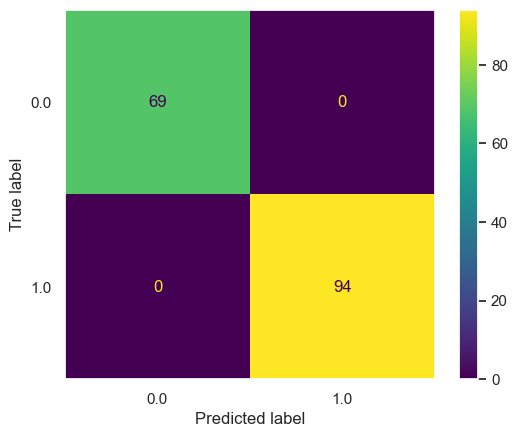

In [85]:
# Creating confusion matrix for train set (baseline parameter)
print('Classification Report : \n', classification_report(y_train_final, y_pred_train_dt))
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_dt, labels=prepmod_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=prepmod_dt.classes_)

disp.plot()
plt.grid(False)
plt.show()

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        36

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



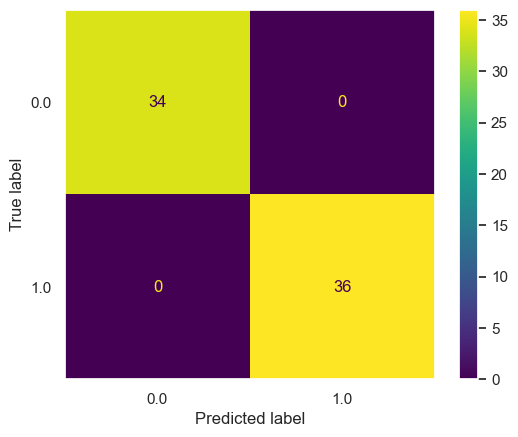

In [86]:
# Creating confusion matrix for test set (baseline parameter)
print('Classification Report : \n', classification_report(y_test_final, y_pred_test_dt))
cm = confusion_matrix(y_test_final, y_pred_test_dt, labels=prepmod_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=prepmod_dt.classes_)

disp.plot()
plt.grid(False)
plt.show()

In [95]:
X_train_final.var()

day              80.050443
Temperature      12.548057
RH              218.160570
Rain              0.144411
FFMC            174.848667
DMC             140.054941
DC             2372.309285
ISI              17.228829
BUI             189.125366
FWI              58.158328
dtype: float64

In [96]:
y_train_final.var()

Classes    0.245626
dtype: float64

In [94]:
X_test_final.var()

day              64.642029
Temperature      14.762112
RH              243.876812
Rain              1.713673
FFMC            212.317607
DMC             150.448333
DC             1719.392300
ISI              16.466586
BUI             183.887752
FWI              48.689201
dtype: float64

When the `F1 score` is equal to 1 for a decision tree algorithm, it indicates that the model has achieved perfect `precision` and `recall` on the test data. This means that the model has correctly classified all the positive (__No Fire__) and negative (__Fire__) samples in the dataset without any false positives or false negatives.

A perfect `F1 score` for a decision tree algorithm is a strong indication that the model is well-suited to the task at hand and is likely to perform well on new, unseen data. It suggests that the decision tree algorithm has identified the most important features in the dataset and has constructed an effective decision tree to make accurate predictions.

However, it's important to note that a perfect `F1 score` may not always be desirable or realistic in practice. Overfitting can occur when a model is trained too well on the training data and becomes too specific to the training set. In such cases, the model may perform well on the training data but poorly on new, unseen data. Therefore, it's important to evaluate the decision tree algorithm on multiple metrics, including `accuracy`, `precision`, `recall`, and `F1 score`, to ensure that it is not overfitting.




---

# ix. Model Inference
> This section explains the process of saving and loading models and other files related to the results of the models that we created in the previous chapter. Since there are only 10 data, handling outliers could be skipped. From here, we can compare and observe if the actual data of `Classes` is correct with the predicted classification.

In [87]:
# Saving Model Files

with open('prepmod_dt.pkl', 'wb') as file_1:
  pickle.dump(prepmod_dt, file_1)

with open('Drop_Columns.txt', 'w') as file_2:
  json.dump(Drop_Columns, file_2)

In [88]:
# Loading Model Files

with open('prepmod_dt.pkl', 'rb') as file_1:
  prepmod_dt = pickle.load(file_1)

with open('Drop_Columns.txt','r') as file_2:
  Drop_Columns = json.load(file_2)

In [89]:
# data inference
df_inf = pd.read_csv('h8dsft_p1m2_Ahmad Luay Adnani_inference.csv')
df_inf_copy = df_inf.copy()
df_inf_copy = df_inf.drop(['Unnamed: 0'],axis=1)
df_inf_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,26,7,2012,36,53,19,0.0,89.2,17.1,98.6,10.0,23.9,15.3,fire
1,3,8,2012,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,not fire
2,4,8,2012,34,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,fire
3,16,8,2012,36,61,18,0.3,80.2,11.7,90.4,2.8,17.6,4.2,fire
4,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,not fire
5,20,9,2012,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire
6,29,7,2012,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,fire
7,30,7,2012,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,fire
8,6,8,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire
9,12,9,2012,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,fire


In [90]:
# Removing unnecessary features
df_inf_final = df_inf_copy.drop(Drop_Columns,axis=1).sort_index()
df_inf_final

,day,year,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,26,2012,36,53,0.0,89.2,17.1,98.6,10.0,23.9,15.3,fire
1,3,2012,35,63,0.3,76.6,5.7,10.0,1.7,5.5,0.8,not fire
2,4,2012,34,69,0.0,85.0,8.2,19.8,4.0,8.2,3.9,fire
3,16,2012,36,61,0.3,80.2,11.7,90.4,2.8,17.6,4.2,fire
4,1,2012,25,76,7.2,46.0,1.3,7.5,0.2,1.8,0.1,not fire
5,20,2012,28,84,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire
6,29,2012,34,59,0.0,88.1,19.5,47.2,7.4,19.5,10.9,fire
7,30,2012,36,56,0.0,88.9,23.8,57.1,8.2,23.8,13.2,fire
8,6,2012,30,54,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire
9,12,2012,31,72,0.0,84.2,8.3,25.2,3.8,9.1,3.9,fire


In [91]:
# Predict using DecisionTree

y_pred_inf = prepmod_dt.predict(df_inf_final) #prepmod_dt from load files
y_pred_inf

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 1.])

In [92]:
# Create Classes Prediction DataFrame
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Forest_Fire_Prediction'],index=df_inf_final.index)
# Rename
y_pred_inf_df['Forest_Fire_Prediction'] = y_pred_inf_df['Forest_Fire_Prediction'].replace({1.0:'fire',0.0:'not fire'})
y_pred_inf_df

,Forest_Fire_Prediction
0,fire
1,not fire
2,fire
3,fire
4,not fire
5,fire
6,fire
7,fire
8,not fire
9,fire


In [93]:
# Comparing the real Classes with predicted classification
model_inf = pd.concat([df_inf_copy['Classes'], y_pred_inf_df['Forest_Fire_Prediction']], axis=1).sort_index()
model_inf

,Classes,Forest_Fire_Prediction
0,fire,fire
1,not fire,not fire
2,fire,fire
3,fire,fire
4,not fire,not fire
5,fire,fire
6,fire,fire
7,fire,fire
8,not fire,not fire
9,fire,fire


It can be seen that our model has 100% accuracy when tested on data inference same as explained in the previous section. 

---

# x. Conclusion and Recommendation
> This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis: 
  -  The number of forest fires that occurred is balanced by the number of forest fires that did not occur.
  - August has the highest average temperature compared to other months, the lowest average relative humidity compared to other months and the lowest average rain intensity compared to other months.
  - The average temperature when a forest fire occurs is 33.82 degree Celsius.
  - The more relative humidity increases, the more likely it is that a forest fire will not occur.
  - Most forest fire incidents occur when it is not raining. But there are also forest fires that occur when it is raining with low intensity.
  - The potential for forest fires increases when the FWI value is in the range of 2-6 (moderate).
  - Month and Ws has a low correlation to the target (Classes).

2. Based on Model Training and Model Evaluation: 
  - Based on the cross-validation score, the Decision Tree algorithm has the highest mean value (0.969) and the lowest standard deviation value (0.024). Hyperparameter tuning is then performed using this algorithm.
  - Based on the Hyperparameter Tuning score, the score of the Decision Tree algorithm using baseline parameters is slightly greater than the score using hyperparameter tuning.
  - The F1 score of decision tree algorithm using baseline parameters is equal to 1, it indicates that the model has achieved perfect precision and recall on the test data. This means that the model has correctly classified all the positive (No Fire) and negative (Fire) samples in the dataset without any false positives or false negatives.
  - However, it's important to note that a perfect F1 score may not always be desirable or realistic in practice. Overfitting can occur when a model is trained too well on the training data and becomes too specific to the training set. In such cases, the model may perform well on the training data but poorly on new, unseen data. Therefore, it's important to evaluate the decision tree algorithm on multiple metrics, including accuracy, precision, recall, and F1 score, to ensure that it is not overfitting.

3. Future work will be to integrate the machine learning models that we make into IoT (Internet of Things)-based smart sensors. IoT sensors can not only observe the real-time conditions of an area, but it can also predict fire when combined with Machine learning.

4. Further Improvements:
  - Incorporating real-time data for more accurate predictions. This improvement highlights the potential benefit of using real-time data to improve the accuracy of predictions, which could be particularly important in preventing forest fire.


---

__References__:
1. Faroudja ABID et al. , [Predicting Forest Fire in Algeria using Data Mining Techniques: Case Study of the Decision Tree Algorithm](https://www.researchgate.net/publication/339062373_Predicting_Forest_Fire_in_Algeria_Using_Data_Mining_Techniques_Case_Study_of_the_Decision_Tree_Algorithm?enrichId=rgreq-c5b26c325e26d77a3db4c7eb82df19a9-XXX&enrichSource=Y292ZXJQYWdlOzMzOTA2MjM3MztBUzo5MzgxMTk3MjU2MDg5NjBAMTYwMDY3NjU4MDExNg%3D%3D&el=1_x_2&_esc=publicationCoverPdf), International Conference on Advanced Intelligent Systems for Sustainable Development (AI2SD 2019) , 08 - 11 July , 2019, Marrakech, Morocco.

2. Sharma, R., Rani, S. & Memon, I. [A smart approach for fire prediction under uncertain conditions using machine learning](https://doi.org/10.1007/s11042-020-09347-x). Multimed Tools Appl 79, 28155–28168 (2020). 